# Assignment #3 - K-means Clustering & Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import prettytable
from scipy.spatial import distance
import random
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Wheat Seeds Dataset

## Data Input


In [2]:
df=pd.read_csv('seeds_dataset.txt',delim_whitespace=True,header=None)
df.columns=['area','perimeter','compactness','length of kernel','width of kernel','asymmetry coefficient','length of kernel groove','label']
df

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## Data Preprocessing 

### Shuffle data

In [3]:
df=sklearn.utils.shuffle(df)
df

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,label
92,18.81,16.29,0.8906,6.272,3.693,3.237,6.053,2
115,19.06,16.45,0.8854,6.416,3.719,2.248,6.163,2
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
19,12.72,13.57,0.8686,5.226,3.049,4.102,4.914,1
156,11.34,12.87,0.8596,5.053,2.849,3.347,5.003,3
...,...,...,...,...,...,...,...,...
33,13.94,14.17,0.8728,5.585,3.150,2.124,5.012,1
187,10.91,12.80,0.8372,5.088,2.675,4.179,4.956,3
163,12.55,13.57,0.8558,5.333,2.968,4.419,5.176,3
11,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,1


### Build table

In [5]:
table1=prettytable.PrettyTable()
table1.field_names=['Wheat seed(K-means)','Accuracy','Recall','Precision']

### split training and testing data

In [6]:
y = df['label'].values
x = df.drop(['label'], axis=1).values

## K-means Clustering

In [7]:
#K-means clustering
k=3

In [8]:
train_num=x.shape[0]  #numbers of samples
feature_num=x.shape[1]  #numbers of features

In [9]:
def euclid_dis(a,b):
    return np.sqrt(np.sum((np.array(a)-np.array(b))**2))

In [10]:
def random_centroids(x,k):
    centroids_ini=np.zeros((k,feature_num))
    index=[x for x in range(train_num)]
    for i in range(k):
        c_id=int(index[i])
        centroids_ini[i]=x[c_id]
    return centroids_ini

In [11]:
def Kmeans(x,k):
    
    #initiate centroids
    centroids=random_centroids(x,k)
    
    #0:屬於哪個centroid 1:distance
    clusters=np.zeros((train_num,2))
    clusters[:,0]=-1
    
    #跑到centroids不再改變為止
    flag=True
    
    while True:
        flag=False
        
        #assignment
        for i in range(train_num):
            distances=[]
            min_dis=1000000.0
            min_index=-1
            #找每個sample最近的centroid
            for j in range(k):
                distance=euclid_dis(x[i,:],centroids[j])
                if distance < min_dis:
                    min_index=j
                    min_dis=distance
            
            #找x在原本cluster裡被歸類的centroid，如果有改變就set flag=True ->下輪繼續跑
            if clusters[i,0]!=min_index:
                clusters[i,:]=min_index,min_dis
                flag=True
        #print("cluster:",clusters)
        
        #update
        for j in range(k):
            #第j個cluster裡的x
            point_in_cluster=x[[m for m in range(train_num) 
                                if clusters[m,0]==j]]
            #採x所有featrues的平均值做為新的centroid
            centroids[j]=np.mean(point_in_cluster,axis=0)
            
        if flag==False:
            break
            
    return centroids,clusters

In [12]:
#np.seterr(divide='ignore', invalid='ignore')
cen,ci=Kmeans(x,k)
#print("centroids: ",cen)
#print(ci[:,0]) #cluster


In [13]:
clu_0_num=[0 for i in range(4)]   #cluster 1的predict label and actual label (pred_label,[1],[2],[3])=>(l,0,0,0)
clu_1_num=[0 for i in range(4)]
clu_2_num=[0 for i in range(4)]
for i in range(len(ci)):
    #計算每個cluster裡，x的target label各有多少
    if(ci[i,0]==0):
        clu_0_num[y[i]]=clu_0_num[y[i]]+1    #第i個x屬於的cluster的label_num=x target label++
    if(ci[i,0]==1):
        clu_1_num[y[i]]=clu_1_num[y[i]]+1
    if(ci[i,0]==2):
        clu_2_num[y[i]]=clu_2_num[y[i]]+1

#選出max number的target label做為每個cluster的y predict

clu_label=0
for i in range(3):
    if(clu_0_num[i+1]>clu_label):
        clu_0_num[0]=i+1
        clu_label=clu_0_num[i+1]

clu_label=0
for i in range(3):
    if(clu_1_num[i+1]>clu_label):
        clu_1_num[0]=i+1
        clu_label=clu_1_num[i+1]

clu_label=0
for i in range(3):
    if(clu_2_num[i+1]>clu_label):
        clu_2_num[0]=i+1
        clu_label=clu_2_num[i+1]


In [14]:
y_pred=[0 for i in range(train_num)]
y_true=y

for i in range(len(ci)):
    if(ci[i,0]==0):
        y_pred[i]=clu_0_num[0]
    if(ci[i,0]==1):
        y_pred[i]=clu_1_num[0]
    if(ci[i,0]==2):
        y_pred[i]=clu_2_num[0]

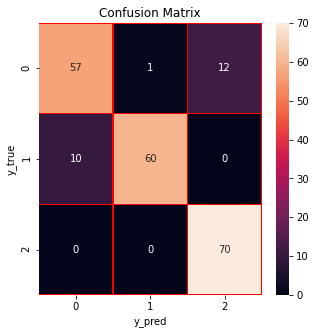

In [15]:
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Confusion Matrix")
plt.show()

In [16]:
acc=round(accuracy_score(y_true, y_pred)*100,4)
recall=round(recall_score(y_true, y_pred,average='weighted')*100,4)
prec=round(precision_score(y_true, y_pred,average='weighted')*100,4)


table1.add_row(["Kmeans clustering(K=3)",acc,recall,prec])
print(table1)

+------------------------+----------+---------+-----------+
|  Wheat seed(K-means)   | Accuracy |  Recall | Precision |
+------------------------+----------+---------+-----------+
| Kmeans clustering(K=3) | 89.0476  | 89.0476 |  89.6004  |
+------------------------+----------+---------+-----------+


# Ionosphere Dataset

## Data Input


In [167]:
df_svm=pd.read_csv('ionosphere.data',header=None)

## Data Preprocessing 

### Shuffle data

In [168]:
df_svm=sklearn.utils.shuffle(df_svm)
df_svm

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
34,1,0,1.00000,-0.15899,0.72314,0.27686,0.83443,-0.58388,1.00000,-0.28207,...,0.14803,1.00000,-0.11582,1.00000,-0.11129,1.00000,0.53372,1.00000,-0.57758,g
350,1,0,0.84710,0.13533,0.73638,-0.06151,0.87873,0.08260,0.88928,-0.09139,...,-0.15114,0.81147,-0.04822,0.78207,-0.00703,0.75747,-0.06678,0.85764,-0.06151,g
176,1,0,0.00000,0.00000,-1.00000,-0.62766,1.00000,0.51064,0.07979,-0.23404,...,0.00000,-0.19149,-0.46809,-0.22340,-0.48936,0.74468,0.90426,-0.67553,0.45745,b
137,1,0,0.26667,-0.10000,0.53333,0.00000,0.33333,-0.13333,0.36667,0.11667,...,0.13333,0.46214,0.05439,0.40000,0.03333,0.46667,0.03333,0.41667,-0.05000,g
274,1,0,0.71521,-0.00647,0.66667,-0.04207,0.63107,-0.05178,0.77994,0.08091,...,-0.05502,0.45105,0.00040,0.31392,-0.06796,0.49191,-0.10680,0.30421,-0.05178,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,1,0,-1.00000,-1.00000,1.00000,1.00000,1.00000,-0.14375,0.00000,0.00000,...,-1.00000,1.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,0.00000,0.00000,b
27,0,0,-1.00000,-1.00000,0.00000,0.00000,-1.00000,1.00000,1.00000,-0.37500,...,-1.00000,-1.00000,1.00000,-1.00000,-1.00000,0.00000,0.00000,-1.00000,1.00000,b
33,1,0,0.71253,-0.02595,0.41287,-0.23067,0.98019,-0.09473,0.99709,-0.10236,...,-0.20392,0.93124,-0.41307,0.63811,-0.21901,0.86136,-0.87354,-0.23186,-1.00000,b
332,1,0,0.87578,0.03727,0.89951,0.00343,0.89210,0.00510,0.86335,0.00000,...,-0.04348,0.82111,0.02033,0.81988,0.08696,0.80757,0.02308,0.80088,0.02441,g


### Build table

In [169]:
table2=prettytable.PrettyTable()
table2.field_names=['ionosphere(SVM)','Accuracy','Recall','Precision']

## Train-Test-Split

In [170]:
y = df_svm[34].values
x = df_svm.drop([34], axis=1).values

In [171]:
#Holdout validation with the ratio 7:3
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

## Support Vector Machine

### Linear Kernel

In [172]:
svm_lin=SVC(kernel='linear',probability=True)
svm_lin.fit(x_train,y_train)

print("Holdout validation accuracy: {}%".format(round(svm_lin.score(x_test,y_test)*100,2)))

Holdout validation accuracy: 88.68%


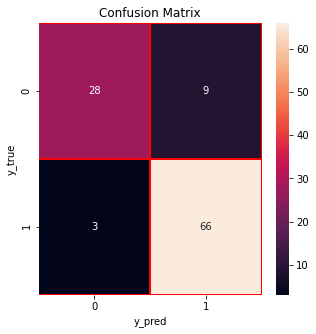

In [173]:
y_pred_nb = svm_lin.predict(x_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Confusion Matrix")
plt.show()

In [174]:
acc=round(accuracy_score(y_true_nb, y_pred_nb)*100,4)
recall=round(recall_score(y_true_nb, y_pred_nb,average='weighted')*100,4)
prec=round(precision_score(y_true_nb, y_pred_nb,average='weighted')*100,4)

table2.add_row(["Holdout-linear kernel",acc,recall,prec])
print(table2)

+-----------------------+----------+---------+-----------+
|    ionosphere(SVM)    | Accuracy |  Recall | Precision |
+-----------------------+----------+---------+-----------+
| Holdout-linear kernel | 88.6792  | 88.6792 |  88.8107  |
+-----------------------+----------+---------+-----------+


### Polynomial Kernel

In [175]:
svm_poly=SVC(kernel='poly',probability=True)
svm_poly.fit(x_train,y_train)

print("Holdout validation accuracy: {}%".format(round(svm_poly.score(x_test,y_test)*100,2)))

Holdout validation accuracy: 74.53%


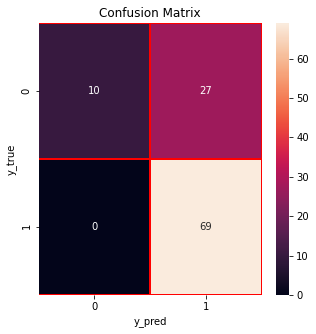

In [176]:
y_pred_nb = svm_poly.predict(x_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Confusion Matrix")
plt.show()

In [177]:
acc=round(accuracy_score(y_true_nb, y_pred_nb)*100,4)
recall=round(recall_score(y_true_nb, y_pred_nb,average='weighted')*100,4)
prec=round(precision_score(y_true_nb, y_pred_nb,average='weighted')*100,4)

table2.add_row(["Holdout-polynomial kernel",acc,recall,prec])
print(table2)

+---------------------------+----------+---------+-----------+
|      ionosphere(SVM)      | Accuracy |  Recall | Precision |
+---------------------------+----------+---------+-----------+
|   Holdout-linear kernel   | 88.6792  | 88.6792 |  88.8107  |
| Holdout-polynomial kernel | 74.5283  | 74.5283 |  81.6922  |
+---------------------------+----------+---------+-----------+


### RBF Kernel

In [178]:
svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(x_train,y_train)

print("Holdout validation accuracy: {}%".format(round(svm_rbf.score(x_test,y_test)*100,2)))

Holdout validation accuracy: 91.51%


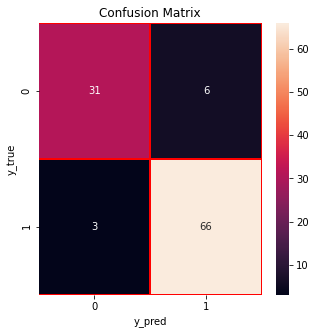

In [179]:
y_pred_nb = svm_rbf.predict(x_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Confusion Matrix")
plt.show()

In [180]:
acc=round(accuracy_score(y_true_nb, y_pred_nb)*100,4)
recall=round(recall_score(y_true_nb, y_pred_nb,average='weighted')*100,4)
prec=round(precision_score(y_true_nb, y_pred_nb,average='weighted')*100,4)

table2.add_row(["Holdout-RBF kernel",acc,recall,prec])
print(table2)

+---------------------------+----------+---------+-----------+
|      ionosphere(SVM)      | Accuracy |  Recall | Precision |
+---------------------------+----------+---------+-----------+
|   Holdout-linear kernel   | 88.6792  | 88.6792 |  88.8107  |
| Holdout-polynomial kernel | 74.5283  | 74.5283 |  81.6922  |
|     Holdout-RBF kernel    | 91.5094  | 91.5094 |  91.4956  |
+---------------------------+----------+---------+-----------+


## Parameter Search
cross validation k=5

### polynomial parameter

In [187]:
degree =[3,5,7]
gamma = [0.001,0.01,0.1]
coef0 = [200,50,100]
poly_param=dict(degree=degree,gamma=gamma,coef0=coef0)
grid = GridSearchCV(svm_poly, param_grid=poly_param, cv=5)
grid_search=grid.fit(x_train,y_train)
print("Best score: %0.3f" % grid_search.best_score_)
print(grid_search.best_estimator_)

Best score: 0.910
SVC(coef0=50, degree=5, gamma=0.1, kernel='poly', probability=True)


In [192]:
poly_param_results = pd.DataFrame(grid_search.cv_results_)

In [193]:
best_poly_model=grid_search.best_estimator_
print("Polynomial kernel best parameter accuracy: {}%".format(round(best_poly_model.score(x_test,y_test)*100,2)))

Polynomial kernel best parameter accuracy: 86.79%


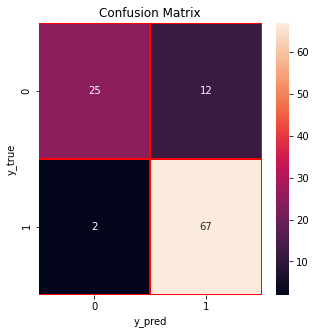

In [194]:
y_pred_nb = best_poly_model.predict(x_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Confusion Matrix")
plt.show()

In [195]:
acc=round(accuracy_score(y_true_nb, y_pred_nb)*100,4)
recall=round(recall_score(y_true_nb, y_pred_nb,average='weighted')*100,4)
prec=round(precision_score(y_true_nb, y_pred_nb,average='weighted')*100,4)

table2.add_row(["Best parameter-polynomial kernel",acc,recall,prec])
print(table2)

+----------------------------------+----------+---------+-----------+
|         ionosphere(SVM)          | Accuracy |  Recall | Precision |
+----------------------------------+----------+---------+-----------+
|      Holdout-linear kernel       | 88.6792  | 88.6792 |  88.8107  |
|    Holdout-polynomial kernel     | 74.5283  | 74.5283 |  81.6922  |
|        Holdout-RBF kernel        | 91.5094  | 91.5094 |  91.4956  |
| Best parameter-polynomial kernel | 86.7925  | 86.7925 |  87.5266  |
+----------------------------------+----------+---------+-----------+


### RBF parameter

In [196]:
gamma =[0.5,0.01,0.1]
rbf_param=dict(gamma=gamma)
grid = GridSearchCV(svm_rbf, param_grid=rbf_param, cv=5)
grid_search=grid.fit(x_train,y_train)
print("Best score: %0.3f" % grid_search.best_score_)
print(grid_search.best_estimator_)

Best score: 0.939
SVC(gamma=0.1, probability=True)


In [197]:
rbf_param_results = pd.DataFrame(grid_search.cv_results_)


In [198]:
best_rbf_model=grid_search.best_estimator_
print("RBF kernel best parameter accuracy: {}%".format(round(best_rbf_model.score(x_test,y_test)*100,2)))

RBF kernel best parameter accuracy: 92.45%


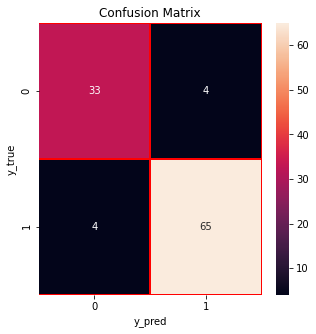

In [199]:
y_pred_nb = best_rbf_model.predict(x_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Confusion Matrix")
plt.show()

In [200]:
acc=round(accuracy_score(y_true_nb, y_pred_nb)*100,4)
recall=round(recall_score(y_true_nb, y_pred_nb,average='weighted')*100,4)
prec=round(precision_score(y_true_nb, y_pred_nb,average='weighted')*100,4)

table2.add_row(["Best parameter-RBF kernel",acc,recall,prec])
print(table2)

+----------------------------------+----------+---------+-----------+
|         ionosphere(SVM)          | Accuracy |  Recall | Precision |
+----------------------------------+----------+---------+-----------+
|      Holdout-linear kernel       | 88.6792  | 88.6792 |  88.8107  |
|    Holdout-polynomial kernel     | 74.5283  | 74.5283 |  81.6922  |
|        Holdout-RBF kernel        | 91.5094  | 91.5094 |  91.4956  |
| Best parameter-polynomial kernel | 86.7925  | 86.7925 |  87.5266  |
|    Best parameter-RBF kernel     | 92.4528  | 92.4528 |  92.4528  |
+----------------------------------+----------+---------+-----------+


# Results 

In [201]:
print(table1)
print(table2)

+------------------------+----------+---------+-----------+
|  Wheat seed(K-means)   | Accuracy |  Recall | Precision |
+------------------------+----------+---------+-----------+
| Kmeans clustering(K=3) | 89.0476  | 89.0476 |  89.6004  |
+------------------------+----------+---------+-----------+
+----------------------------------+----------+---------+-----------+
|         ionosphere(SVM)          | Accuracy |  Recall | Precision |
+----------------------------------+----------+---------+-----------+
|      Holdout-linear kernel       | 88.6792  | 88.6792 |  88.8107  |
|    Holdout-polynomial kernel     | 74.5283  | 74.5283 |  81.6922  |
|        Holdout-RBF kernel        | 91.5094  | 91.5094 |  91.4956  |
| Best parameter-polynomial kernel | 86.7925  | 86.7925 |  87.5266  |
|    Best parameter-RBF kernel     | 92.4528  | 92.4528 |  92.4528  |
+----------------------------------+----------+---------+-----------+


# Comparison & Conclusion 

# Questions 

## K-means Clustering

> Choose two features to execute your K-means function and draw a scatter plot with the computed centers and the predicted label for each instance.

In [4]:
#choose compactness ,length of kernel
q_x=df.loc[:,['compactness','length of kernel']].values
q_y=df['label'].values

In [5]:
#K-means clustering
k=3

In [6]:
train_num=q_x.shape[0]  #numbers of samples
feature_num=q_x.shape[1]  #numbers of features

In [7]:
def euclid_dis(a,b):
    return np.sqrt(np.sum((np.array(a)-np.array(b))**2))

In [8]:
def random_centroids(x,k):
    centroids_ini=np.zeros((k,feature_num))
    index=[x for x in range(train_num)]
    np.random.shuffle(index)
    for i in range(k):
        c_id=int(index[i])
        centroids_ini[i]=x[c_id]
    return centroids_ini

In [9]:
def Kmeans(x,k):
    
    #initiate centroids
    centroids=random_centroids(x,k)
    
    #0:label refering to 1:distance
    clusters=np.zeros((train_num,2))
    clusters[:,0]=-1
    
    #running until the centroids converage
    flag=True
    
    while True:
        flag=False;
        
        #assignment
        for i in range(train_num):
            distances=[]
            min_dis=1000000.0
            min_index=-1
            #find nearest centhroids for each sample
            for j in range(k):
                distance=euclid_dis(x[i,:],centroids[j])
                if distance < min_dis:
                    min_index=j
                    min_dis=distance
            
            #if the centroid of sample changed,set flag=True
            if clusters[i,0]!=min_index:
                clusters[i,:]=min_index,min_dis
                flag=True
        #print("cluster:",clusters)
        
        #update:find new centroids
        for j in range(k):
            point_in_cluster=x[[m for m in range(train_num) if clusters[m,0]==j]]
            centroids[j]=np.mean(point_in_cluster,axis=0)
            
        if flag==False:
            break
            
    return centroids,clusters

In [10]:
q_cen,q_ci=Kmeans(q_x,k)
#showplt(q_x,k,q_cen,q_ci)

In [16]:
clu_0_num=[0]*4   #cluster 1的predict label and actual label (pred_label,[1],[2],[3])=>(l,0,0,0)
clu_1_num=[0]*4
clu_2_num=[0]*4
for i in range(len(q_ci)):
    #計算每個cluster裡，x的target label各有多少
    if(q_ci[i,0]==0):
        clu_0_num[q_y[i]]=clu_0_num[q_y[i]]+1    #第i個x屬於的cluster的label_num=x target label++
    if(q_ci[i,0]==1):
        clu_1_num[q_y[i]]=clu_1_num[q_y[i]]+1
    if(q_ci[i,0]==2):
        clu_2_num[q_y[i]]=clu_2_num[q_y[i]]+1

#選出max number的target label做為每個cluster的y predict

clu_label=0
for i in range(3):
    if(clu_0_num[i+1]>clu_label):
        clu_0_num[0]=i+1
        clu_label=clu_0_num[i+1]

clu_label=0
for i in range(3):
    if(clu_1_num[i+1]>clu_label):
        clu_1_num[0]=i+1
        clu_label=clu_1_num[i+1]

clu_label=0
for i in range(3):
    if(clu_2_num[i+1]>clu_label):
        clu_2_num[0]=i+1
        clu_label=clu_2_num[i+1]


In [17]:
q_pred=[0 for i in range(train_num)]

for i in range(len(q_ci)):
    if(q_ci[i,0]==0):
        q_pred[i]=clu_0_num[0]
    if(q_ci[i,0]==1):
        q_pred[i]=clu_1_num[0]
    if(q_ci[i,0]==2):
        q_pred[i]=clu_2_num[0]
        


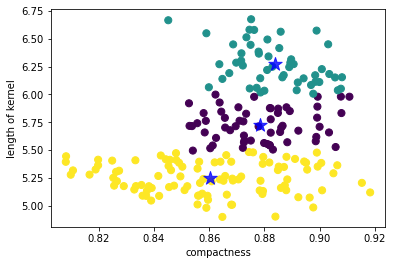

In [18]:
#draw scatter
plt.scatter(q_x[:, 0], q_x[:, 1], c=q_pred, s=50, cmap='viridis')
plt.scatter(q_cen[:, 0], q_cen[:, 1], c='blue', s=200, alpha=0.8,marker='*')
plt.xlabel('compactness')
plt.ylabel('length of kernel')
plt.show()

## Support Vector Machine

> Show the average performance of K-fold cross-validation of parameter search in tables for each kernel. 

### Polynomial kernel

In [213]:
poly_param_results[
    ['params', 'mean_test_score', 'std_test_score']
]

,params,mean_test_score,std_test_score
0,"{'coef0': 200, 'degree': 3, 'gamma': 0.001}",0.844898,0.037852
1,"{'coef0': 200, 'degree': 3, 'gamma': 0.01}",0.861224,0.035112
2,"{'coef0': 200, 'degree': 3, 'gamma': 0.1}",0.881633,0.029994
3,"{'coef0': 200, 'degree': 5, 'gamma': 0.001}",0.848980,0.035583
4,"{'coef0': 200, 'degree': 5, 'gamma': 0.01}",0.877551,0.036507
5,"{'coef0': 200, 'degree': 5, 'gamma': 0.1}",0.889796,0.030544
6,"{'coef0': 200, 'degree': 7, 'gamma': 0.001}",0.844898,0.027683
7,"{'coef0': 200, 'degree': 7, 'gamma': 0.01}",0.869388,0.027683
8,"{'coef0': 200, 'degree': 7, 'gamma': 0.1}",0.893878,0.035112
9,"{'coef0': 50, 'degree': 3, 'gamma': 0.001}",0.857143,0.022356


### RBF kernel

In [214]:
rbf_param_results[
    ['params', 'mean_test_score', 'std_test_score']
]

,params,mean_test_score,std_test_score
0,{'gamma': 0.5},0.906122,0.035583
1,{'gamma': 0.01},0.922449,0.041625
2,{'gamma': 0.1},0.938776,0.022356
